In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../code')

from diusst_funcs import make_mesh
from mscfunctions import fresnel

# Incoming SW radiation
def q_sw(t, a, reflect=1, n_a=1., n_w=1.34):
    if reflect == 1:
        return a * np.cos(2*np.pi*t/(60*60*24)+np.pi) * fresnel(2*np.pi*t/(60*60*24)+np.pi, n1=n_a, n2=n_w)
    elif reflect == 0:
        return a * np.cos(2*np.pi*t/(60*60*24)+np.pi)

# Boundary layer air temperature
def T_a(t, Tmax, Tmin, tau=0):
    return (Tmax+Tmin)/2 - (Tmax-Tmin)/2 * np.cos(2*np.pi/(60*60*24)*(t-tau))


dz0 = 0.10,
ngrid = 40,
z_f = 10,
diffu = 1,
opac = 1,
k_mol = 1e-7,
maxwind = 10,
strat = 5,
stratdepth=1,
windstrength = 1

times_orig = np.linspace(0,2*86400,2*24*60)
swrad_orig = q_sw(times_orig,1)*1000
swrad_orig2 = q_sw(times_orig,1,reflect=0)*1000
atemp_orig = T_a(times_orig,301,299)
wind_orig = 1+ windstrength + 1*np.cos(times_orig/86400*2*np.pi)
humid_orig = np.ones(len(times_orig)) * 0.01
ftemp_orig = np.ones(len(times_orig)) * 300
sst_orig = np.zeros(len(times_orig))
sst_err_orig = np.ones(len(times_orig)) * 0.1

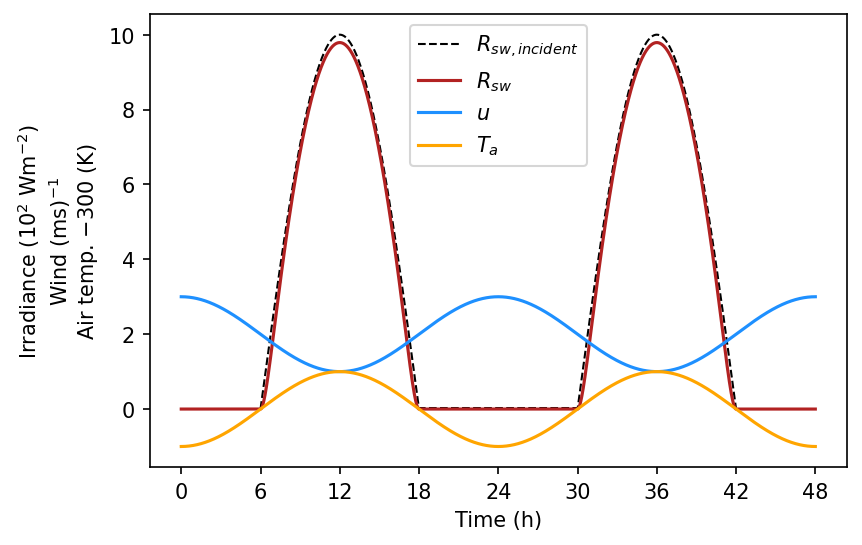

In [41]:
fig, ax = plt.subplots(dpi=150)
ax.plot(times_orig[swrad_orig2>0]/86400*24,swrad_orig2[swrad_orig2>0]/100,label=r'$R_{sw, incident}$',c='k',ls='--',zorder=1,lw=1)
ax.plot(times_orig/86400*24,swrad_orig/100,label=r'$R_{sw}$',c='firebrick')
ax.plot(times_orig/86400*24,wind_orig,label='$u$',c='dodgerblue')
ax.plot(times_orig/86400*24,atemp_orig-300,label='$T_a$',c='orange')
ax.set(xlabel='Time (h)',ylabel='Irradiance (10$^2$ Wm$^{-2}$)\nWind (ms)$^{-1}$\nAir temp. $-300$ (K)',xticks=np.arange(0,48+6,6))
ax.legend()

#plt.savefig('../../Masterarbeit/thesis/figs/idealforcing.pdf', bbox_inches='tight')